# Data Preprocessing and Feature Engineering in Machine Learning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("adult_with_headers.csv")

In [ ]:
data.shape

(32561, 15)

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data = data.replace('?', np.nan)

In [ ]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:
# dropping rows with too many missing values
data = data.dropna(subset=['occupation', 'workclass'])

In [ ]:
for col in data.select_dtypes('object'):
    data[col] = data[col].fillna(data[col].mode()[0]) 
    # it will fill remaining missing values (if any) using mode for  categorical data

In [ ]:
print("After cleaning:", data.isnull().sum().sum(), "missing values left")

After cleaning: 0 missing values left


# 

**SCALING NUMERICAL FEATURES**

In [ ]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
num_data = data[num_cols]

In [ ]:
std_scaler = StandardScaler()
standard_scaled = pd.DataFrame(std_scaler.fit_transform(num_data), columns=num_cols)

In [ ]:
standard_scaled.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


1. Standard Scaling (Z-score Normalization):
Standard scaling transforms features so they have a mean of 0 and a standard deviation of 1.
This method is best when the data is normally distributed or when features vary in scale but we don’t want to limit their range.
It is especially useful for algorithms that assume Gaussian (normal) distribution or that are sensitive to feature magnitude, such as:

a. Logistic Regression

b. Support Vector Machines (SVM)

c. Linear Regression

d. Principal Component Analysis (PCA)

Because these models rely on the concept of “distance” or “variance”, standardizing ensures that no single feature dominates due to its larger scale.

In [ ]:
mm_scaler = MinMaxScaler()
minmax_scaled = pd.DataFrame(mm_scaler.fit_transform(num_data), columns=num_cols)

In [ ]:
minmax_scaled.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


2. Min-Max Scaling (Normalization):
Min-Max scaling rescales the data into a fixed range, usually [0,1].
This is more suitable when we need bounded input values, like for:

Neural networks (since activation functions like sigmoid/tanh work better within small ranges)

KNN or K-Means clustering (where distance is computed directly)


It preserves the shape of the original distribution and keeps all values within a simple, interpretable range.
However, it is sensitive to outliers a single extreme value can shrink the range for all other points.

# 

**ENCODING CATERGORICAL** 

In [ ]:
cat_cols = data.select_dtypes(include='object').columns

In [ ]:
few_cat = [c for c in cat_cols if data[c].nunique() < 5]
data_encoded = pd.get_dummies(data, columns=few_cat, drop_first=True)

In [ ]:
label_enc = LabelEncoder()
for c in cat_cols:
    if c not in few_cat:
        data_encoded[c] = label_enc.fit_transform(data[c])

In [ ]:
data_encoded.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,True,False
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,True,False
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,True,False
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,True,False
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,False,False


# 

**FEATURE ENGINEERING**

In [ ]:
data_encoded['age_group'] = pd.cut(data_encoded['age'], bins=[0,25,45,65,100],
                                labels=['Young','Adult','Mid-age','Senior'])

In [ ]:
data_encoded['hours_income_ratio'] = data_encoded['hours_per_week'] / (data_encoded['education_num'] + 1)

In [ ]:
data_encoded.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,age_group,hours_income_ratio
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,True,False,Adult,2.857143
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,True,False,Mid-age,0.928571
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,True,False,Adult,4.000000
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,True,False,Mid-age,5.000000
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,False,False,Adult,2.857143


**TRANSFORM SKEWED FEATURE**

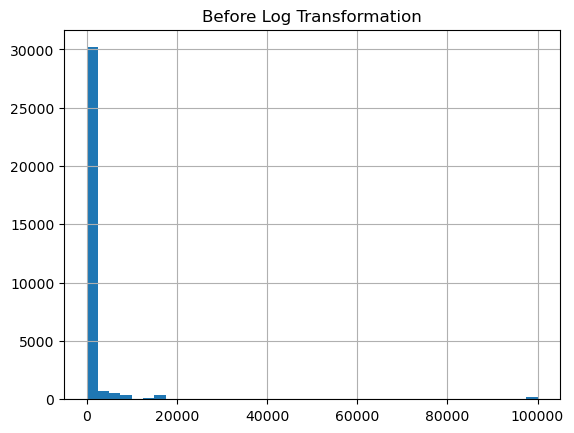

In [ ]:
data_encoded['capital_gain'].hist(bins=40)
plt.title('Before Log Transformation')
plt.show()

In [ ]:
data_encoded['capital_gain'] = np.log1p(data_encoded['capital_gain'])

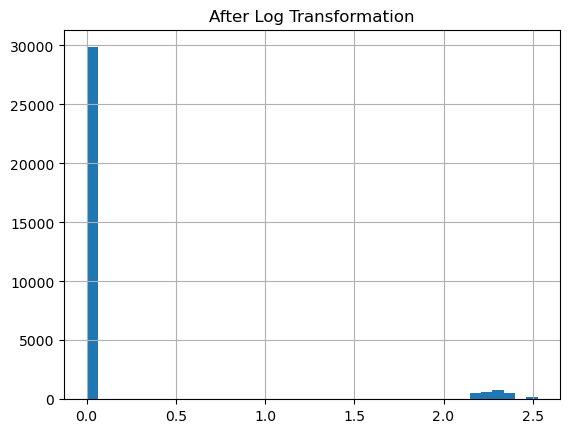

In [ ]:
data_encoded['capital_gain'].hist(bins=40)
plt.title('After Log Transformation')
plt.show()

# 

**OUTLIER DETECTION (ISOLATION FOREST)**

In [ ]:
iso = IsolationForest(contamination=0.02, random_state=42)

In [ ]:
outliers = iso.fit_predict(data_encoded[num_cols])

In [ ]:
data_encoded['outlier'] = outliers

In [ ]:
data_encoded = data_encoded[data_encoded['outlier'] == 1]

In [ ]:
data_encoded.drop('outlier', axis=1, inplace=True)

In [ ]:
print("After removing outliers:", data_encoded.shape)

After removing outliers: (31909, 17)


# 

**Feature Selection using PPS (Predictive Power Score)**

In [ ]:
!pip install ppscore

In [ ]:
import ppscore as pps

In [37]:
pps_matrix = pps.matrix(data_encoded)
pps_matrix.sort_values(by='ppscore', ascending=False).head()

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.0,predict_itself,True,None,0.0000,1.0,None
126,relationship,relationship,1.0,predict_itself,True,None,0.0000,1.0,None
54,education,education,1.0,predict_itself,True,None,0.0000,1.0,None
55,education,education_num,1.0,regression,True,mean absolute error,1.8754,0.0,DecisionTreeRegressor()
71,education_num,education,1.0,regression,True,mean absolute error,2.6872,0.0,DecisionTreeRegressor()


In [4]:
data_encoded.shape()


NameError: name 'data_encoded' is not defined

In [39]:
data_encoded.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,age_group,hours_income_ratio
0,39,7,77516,9,13,4,1,1,4,7.684784,0,40,39,1,0,Adult,2.857143
1,50,6,83311,9,13,2,4,0,4,0.000000,0,13,39,1,0,Mid-age,0.928571
2,38,4,215646,11,9,0,6,1,4,0.000000,0,40,39,1,0,Adult,4.000000
3,53,4,234721,1,7,2,6,0,2,0.000000,0,40,39,1,0,Mid-age,5.000000
4,28,4,338409,9,13,2,10,5,2,0.000000,0,40,5,0,0,Adult,2.857143
